# 자기회귀 (AR, Autoregressive)

## 개요
AR 모델은 이전 시점의 값들이 현재 시점의 값에 영향을 준다고 가정하여, 과거 값들을 이용해 현재 값을 예측하는 모델

## 수식
<img src="../assets/imgs/AR_math.png" alt="AR"/>

## 실습

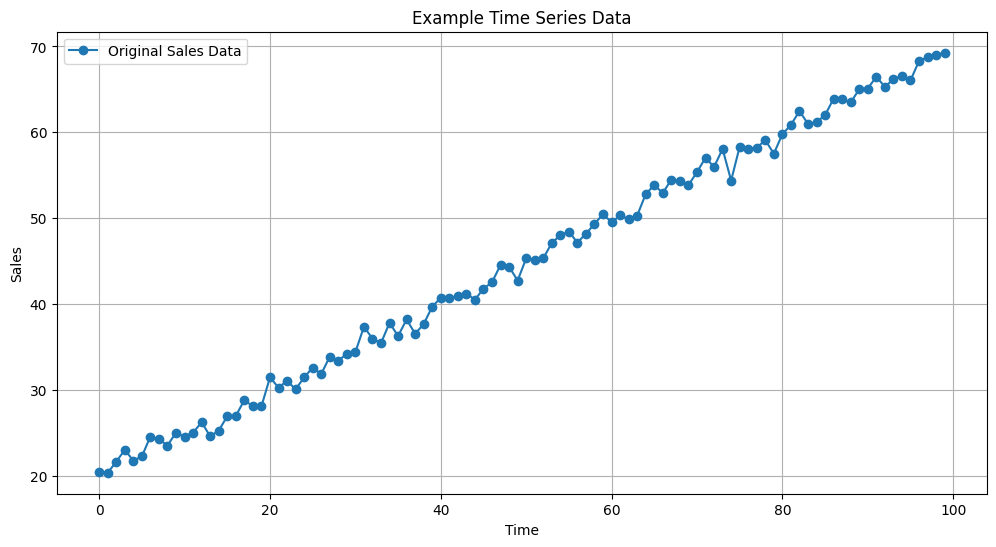

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     AutoReg(3)   Log Likelihood                -144.250
Method:               Conditional MLE   S.D. of innovations              1.071
Date:                Wed, 09 Oct 2024   AIC                            298.500
Time:                        14:24:46   BIC                            311.373
Sample:                             3   HQIC                           303.705
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9970      0.368      2.707      0.007       0.275       1.719
Sales.L1       0.3444      0.095      3.612      0.000       0.158       0.531
Sales.L2       0.3134      0.096      3.257      0.0

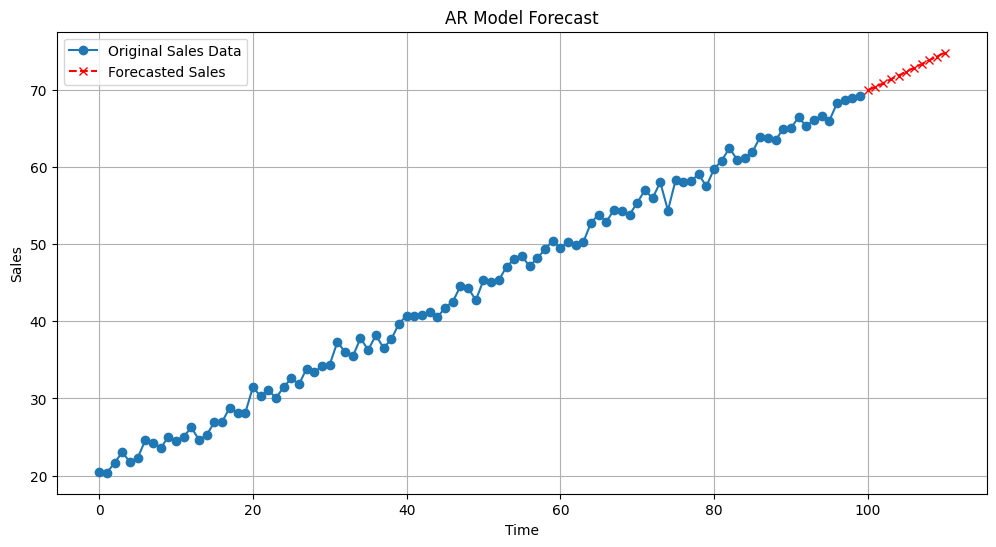

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# 1. 예시 데이터 생성 (랜덤 시계열 데이터)
np.random.seed(42)  # 재현 가능성을 위한 시드 값 설정
n = 100  # 데이터 포인트 수
noise = np.random.normal(0, 1, n)  # 평균 0, 표준편차 1의 노이즈 생성
data = pd.Series(20 + 0.5 * np.arange(n) + noise, name='Sales')  # 트렌드가 있는 데이터 생성

# 2. 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# 3. AR 모형 학습
lag_value = 3  # 차수(lag) 값 설정 (예시: 3)
ar_model = AutoReg(data, lags=lag_value).fit()

# 4. 모델 요약
print(ar_model.summary())

# 5. 예측 수행
forecast_start = len(data)  # 예측 시작점 (현재 데이터 끝부분)
forecast_end = forecast_start + 10  # 예측 종료점 (현재 데이터 이후 10개 포인트 예측)
forecast = ar_model.predict(start=forecast_start, end=forecast_end)

# 6. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.plot(forecast, label='Forecasted Sales', marker='x', linestyle='--', color='red')
plt.title('AR Model Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()
